In [1]:
from main import *
import time as time

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [75]:
A = [1, 'horse', 3]



'1, horse, 3'

In [82]:
cell.show_reactions(output_node=2)

    Reaction Type       Reactants    Enzymes    Products
---------------------  -----------  ---------  ----------
catalytic_degradation       2        OUTPUT
catalytic_degradation    OUTPUT         3


 Regulation Type    Transcription Factor    Target Gene
-----------------  ----------------------  -------------
   activation              OUTPUT             OUTPUT
   activation              INPUT                 3
   activation                2                   2
   repression              OUTPUT                2


In [8]:
# sequentially mutate cell
cell = Cell(1, permanent_genes=2, input_nodes=1)

for _ in range(0, 500):
    _, cell = cell.divide(20)
    connected = cell.prune_graph(input_node=0)

if connected is True:    
    cell.show_topology(output_node=2)

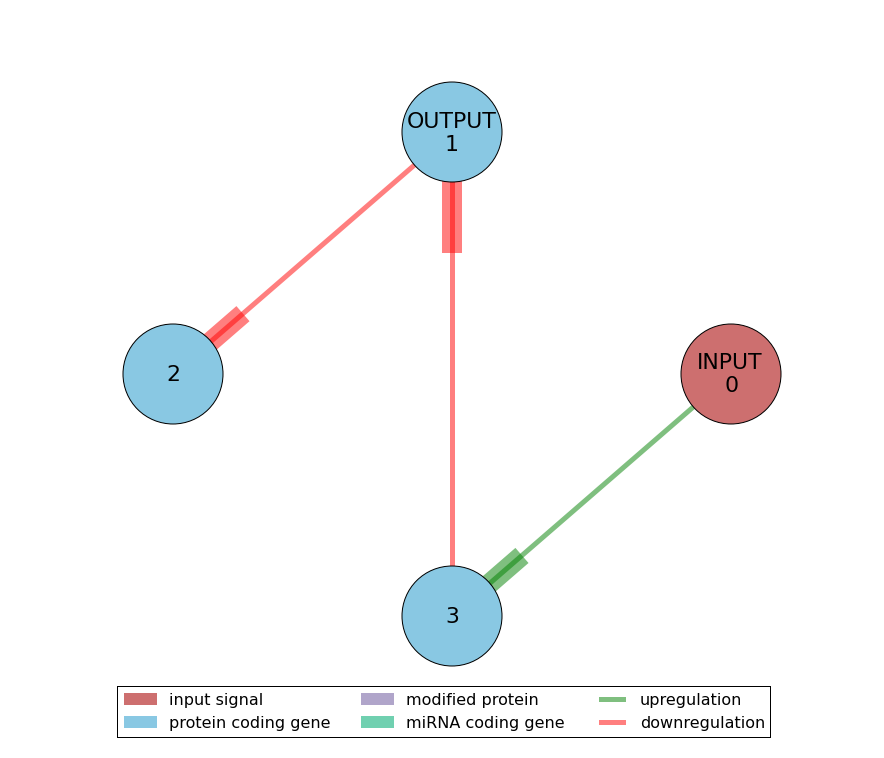

In [19]:
connected = cell.prune_graph(input_node=0)
cell.show_topology(output_node=2)

In [19]:
print(cell.coding_rnas)
print(cell.non_coding_rnas)
print(cell.removable_genes)

[1, 3, 11, 14]
[8, 9, 10]
[11, 14]


In [84]:
cell.show_reactions(grn_indices=True)

Reaction Type          Reactants    Enzymes    Products
---------------------  -----------  ---------  ----------
catalytic_degradation  [7]          [6]        []
miRNA_silencing        [8, 8]       []         []
catalytic_degradation  [4]          [3]        []


Regulation Type      Target Gene    Transcription Factor
-----------------  -------------  ----------------------
activation                     1                       1
repression                     1                       2
activation                     2                       1
activation                     3                       3
activation                     5                       3
activation                     4                       2
repression                     8                       3
repression                     2                       4


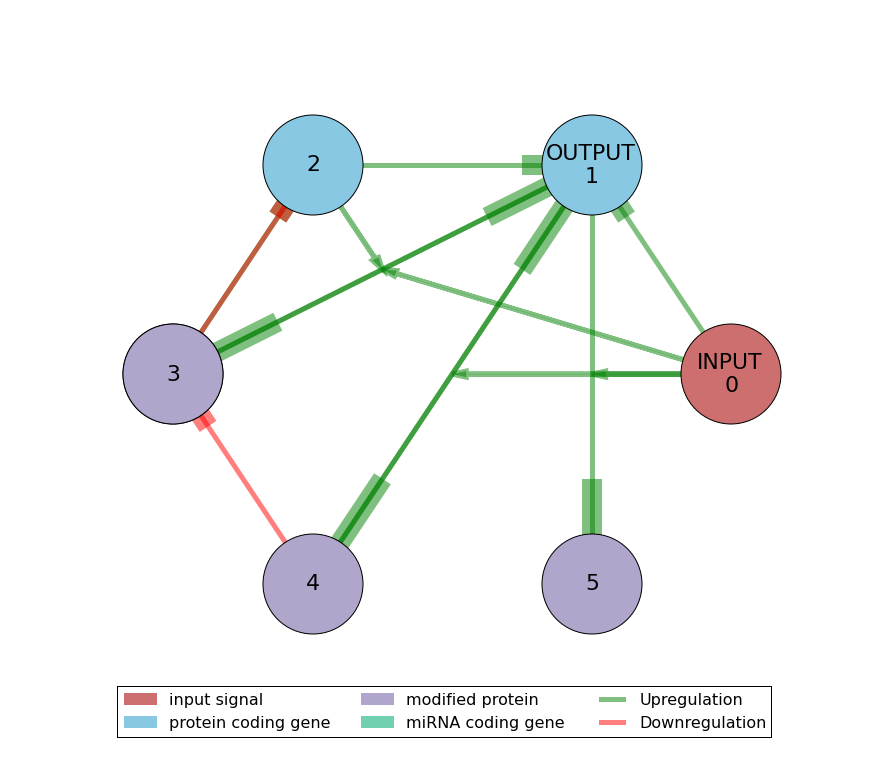

In [31]:
cell.show_topology(output_node=2)

In [32]:
times, states, key = cell.simulate(input_signal=[(0, 1), (200, 1)], input_node=0)

for state in states:
    plt.plot(times, state)
ax = plt.gca()

stiff equation solver failed


TypeError: 'NoneType' object is not iterable

In [33]:
cell.show_reactions()

Reaction Type           Reactants    Enzymes    Products
----------------------  -----------  ---------  ----------
modification            [2]          []         [3221]
catalytic_degradation   [4]          [3221]     []
catalytic_modification  [3221]       [0]        [2]
catalytic_modification  [2]          [0]        [3241]
catalytic_degradation   [3221]       [3241]     []
catalytic_modification  [3221]       [4]        [2]
catalytic_modification  [2]          [0]        [3256]
modification            [3241]       []         [2]


Regulation Type      Target Gene    Transcription Factor
-----------------  -------------  ----------------------
activation                     1                       0
activation                     1                       4
activation                     3                    3221
